## Classification demo including training

In [44]:
#!pip install keras

In [45]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [46]:
## Initialising the CNN
classifier = Sequential()

In [47]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [48]:
## Flattening
classifier.add(Flatten())

In [49]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [50]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [51]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [53]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Administrator/Downloads/helmet_detection/helmet_detection/training',
                                               target_size=(150,150),
                                               
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [56]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [57]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [58]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Administrator/Downloads/helmet_detection/helmet_detection/testing',
                                            target_size=(150,150),
                                            
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [59]:
#!pip install pillow

In [60]:
from PIL import Image

In [61]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
21/21 [==============================] - 39s 2s/step - loss: 0.6973 - accuracy: 0.5456 - val_loss: 0.5947 - val_accuracy: 0.4856
Epoch 2/5
21/21 [==============================] - 37s 2s/step - loss: 0.5210 - accuracy: 0.7465 - val_loss: 0.3160 - val_accuracy: 0.8654
Epoch 3/5
21/21 [==============================] - 37s 2s/step - loss: 0.3699 - accuracy: 0.8454 - val_loss: 0.2071 - val_accuracy: 0.8558
Epoch 4/5
21/21 [==============================] - 37s 2s/step - loss: 0.2909 - accuracy: 0.8794 - val_loss: 0.2206 - val_accuracy: 0.8317
Epoch 5/5
21/21 [==============================] - 36s 2s/step - loss: 0.3471 - accuracy: 0.8671 - val_loss: 0.1532 - val_accuracy: 0.9038


## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [62]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Administrator/Downloads/helmet_detection/helmet_detection/single_prediction/abi.jpg',target_size =(150,150))


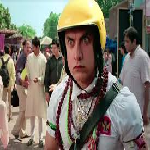

In [63]:
test_image

In [64]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [65]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,150,150,3)

In [66]:
result = classifier.predict(test_image)

In [67]:
## Class label of dog and cat

if result == 1:
    prediction = 'with out helmate'
else:
    prediction = 'helmate'
    

In [68]:
prediction

'helmate'

In [69]:
#steps_per_epoch=50

## save mode
